# Applying Tabular Methods

### Q learning on the Deterministc Environment

In [ ]:
# import cv2
import gym as gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import optuna

In [ ]:
env = SquirrelPet()

epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
gamma = 0.95  # Discount factor
alpha = 0.15  # Learning rate
decay_rate = 0.995  # Epsilon decay rate per episode
total_episodes = 1000 
max_timestamp = 10
qt = np.zeros((env.obs_space.n, env.action_space.n))

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None
for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0  
    

    while True:

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qt[state_index])
    

        next_state, reward, terminated, truncated, _ = env.step(action)
        total_steps += 1 
        next_strt_idx = env.obs_space_to_index(next_state)
        


        qt[state_index, action] += alpha * (reward + gamma * np.max(qt[next_strt_idx]) - qt[state_index, action])


        state_index = next_strt_idx
        total_rewards += reward
        
        if terminated or truncated:
            break
    
    penalties_per_episode.append(env.get_penalty_count())  
    
    # Q-table for every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table:")
        print(qt)

        # average penalties
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state


Episode: 100
Q-table:
[[261.21072224 210.44818335 189.78890182 238.54036283]
 [274.27837149 163.76200021 142.22521201 150.54278704]
 [ 53.60390174  66.87575693 198.57737294  90.74973246]
 [  0.           0.           0.           0.        ]
 [107.68757804 163.09589835 324.08762921 232.73113264]
 [  0.           0.           0.           0.        ]
 [ 79.56440545  80.29173058  42.25816205 204.92550568]
 [  5.45743573 109.3976171   11.02996931   5.45793078]
 [115.76571291 175.23391922  98.18003386  26.41016195]
 [ 31.80530592 286.06087423 126.87389425  79.78131707]
 [  0.           0.           0.           0.        ]
 [ 78.68279391   0.           1.29493573   0.        ]
 [  0.           0.           0.           0.        ]
 [  1.75313449  39.26367458   8.30326772  76.53118417]
 [ -2.38996875  40.03030424  31.12138771  -0.83488958]
 [  0.           0.           0.           0.        ]]
Average Penalties in Last 100 Episodes: 0.54
Episode: 100, Average Steps: 9.96
Episode: 200
Q-tab

In [ ]:
# import pickle

# # Assuming qt is your Q-table after training
# qt = ...  # Your trained Q-table here

# # Save the Q-table with pickle
# with open('q_table_det.pkl', 'wb') as f:
#     pickle.dump(qt, f)

# print("Q-table saved")


- Evaluation results for the Qlearning - Deterministic

- Print the initial and final q-table

In [ ]:
initial_qt = np.zeros((env.obs_space.n, env.action_space.n))
print("Initial Q-table:")
print(initial_qt)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
print("\nTrained Q-table:")
print(qt)


Trained Q-table:
[[755.68046985 738.77036707 751.0243014  738.26886925]
 [802.90723268 680.44233739 685.2680236  651.8865724 ]
 [314.22336146 202.29621912 771.78893625 352.11472132]
 [  0.           0.           0.           0.        ]
 [401.54491784 453.51165122 799.73618402 523.83457806]
 [  0.           0.           0.           0.        ]
 [699.27546269 707.8774757  713.63571923 802.4011804 ]
 [ 80.91164114 763.65444993  61.03464592 266.25539345]
 [273.36777616 541.48395366 154.8038645  143.15450001]
 [165.75564667 798.33997557 500.56647495 337.898102  ]
 [  0.           0.           0.           0.        ]
 [712.28378908 291.7648793  123.42309541 158.61098168]
 [  0.           0.           0.           0.        ]
 [ 11.64585806 100.68806994  54.20890611 291.67487213]
 [ 33.83503922 169.49361578 144.16360569  48.33122515]
 [  0.           0.           0.           0.        ]]


- Total Reward / Episode

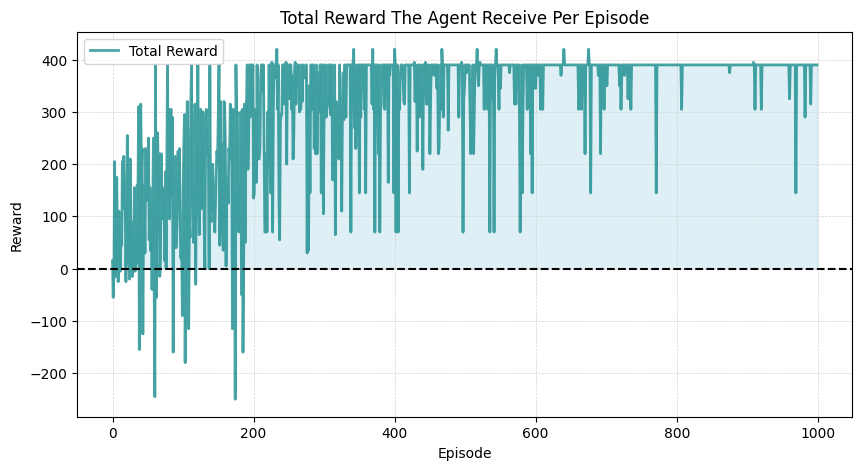

In [ ]:
# total reward per episode graph
plt.figure(figsize=(10, 5))
plt.plot(rewards_epi, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Total Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Total Reward The Agent Receive Per Episode')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
plt.fill_between(range(len(rewards_epi)), rewards_epi, color="lightblue", alpha=0.4)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


- Epsilon Decay

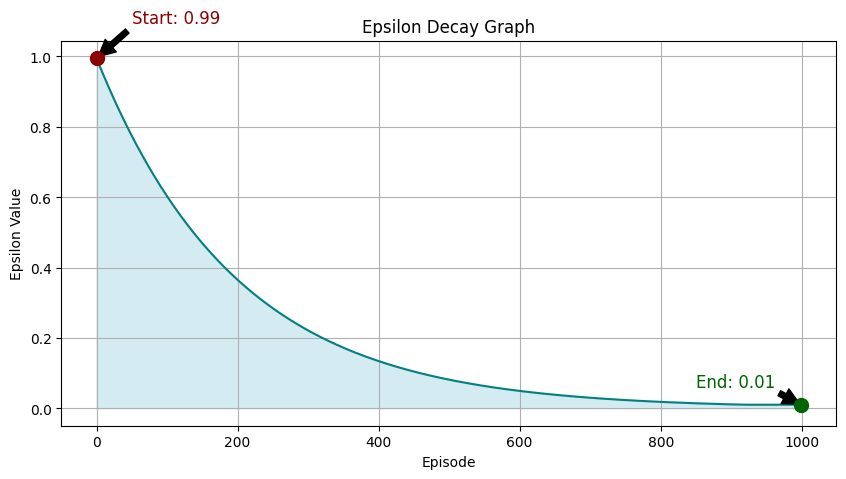

In [ ]:
# epsilon decay graph
plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, color='Teal', label='Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Graph')

plt.fill_between(range(len(epsilon_values)), epsilon_values, color="lightblue", alpha=0.5)

plt.scatter(0, epsilon_values[0], color='darkred', s=100, zorder=5, label='Start')
plt.scatter(len(epsilon_values)-1, epsilon_values[-1], color='darkgreen', s=100, zorder=5, label='End')

# Annotations
plt.annotate(f'Start: {epsilon_values[0]:.2f}', xy=(0, epsilon_values[0]), xytext=(50, epsilon_values[0]+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkred')
plt.annotate(f'End: {epsilon_values[-1]:.2f}', xy=(len(epsilon_values)-1, epsilon_values[-1]), xytext=(len(epsilon_values)-150, epsilon_values[-1]+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkgreen')



plt.grid(True)
plt.show()

-  environment for at 10 episodes, where the agent chooses only greedy actions from the learned policy. 

In [ ]:
greedy_rewards = []
for _ in range(10):
    total_reward = 0
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)

    while True:
        action = np.argmax(qt[state_index])
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        total_reward += reward
        state_index = next_strt_idx
        if terminated or truncated:
            print(f"Episode {episode + 1} Reward: {round(total_reward, 4)}")
            break

    greedy_rewards.append(total_reward)



Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390
Episode 1000 Reward: 390


- Include a plot of the total reward per episode for the greedy actions above!.

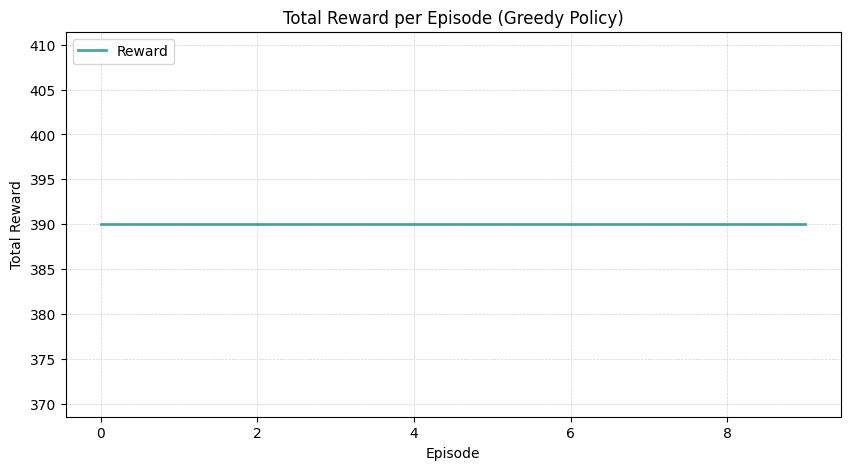

In [ ]:
# total rewards for 10 episodes
plt.figure(figsize=(10, 5))
plt.plot(greedy_rewards, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Greedy Policy)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()





Hyperparameter tuning. Select two hyperparameters to tune to get better results:

- Discount factor (γ)
- Epsilon decay rate
- Epsilon min/max values
- Number of episodes
- Max timesteps



In [ ]:
performance_dict = {}

def training_loop(env, d , max_timestamp):
    

    epsilon = 1.0  # Initial exploration rate
    epsilon_min = 0.01  # Minimum exploration rate
    gamma = 0.95  # Discount factor
    alpha = 0.15  # Learning rate
    decay_rate = d  # Epsilon decay rate per episode
    total_episodes = 1000 
    max_timestamp = max_timestamp
    qt = np.zeros((env.obs_space.n, env.action_space.n))

    rewards_epi = []
    epsilon_values = []
    steps_per_episode = []
    penalties_per_episode = []

    final_state = None
    for episode in range(total_episodes):
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)
        total_rewards = 0
        total_steps = 0  
        

        while True:

            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(qt[state_index])
        

            next_state, reward, terminated, truncated, _ = env.step(action)
            total_steps += 1 
            next_strt_idx = env.obs_space_to_index(next_state)
            


            qt[state_index, action] += alpha * (reward + gamma * np.max(qt[next_strt_idx]) - qt[state_index, action])


            state_index = next_strt_idx
            total_rewards += reward
            
            if terminated or truncated:
                break
        
        penalties_per_episode.append(env.get_penalty_count())  
        

        epsilon = max(epsilon_min, epsilon * decay_rate)
        epsilon_values.append(epsilon)
        rewards_epi.append(total_rewards)
        steps_per_episode.append(total_steps)


        if episode == total_episodes - 1:
            final_state = env.state

    final_reward = np.mean(rewards_epi[-100:]) 
    performance_dict[(alpha, gamma, max_timestamp)] = final_reward
    return qt, rewards_epi, epsilon_values, final_state
        


In [ ]:
def evaluate_loop(env, max_timestamp, decay, qt, rewards_epi, epsilon_values, final_state):
    print(f"Max Timestamp, Decay Rate:  {max_timestamp}, {decay}")

    initial_qt = np.zeros((env.obs_space.n, env.action_space.n))
    print("Initial Q-table:")
    print(initial_qt)
    print("\nTrained Q-table:")
    print(qt)


    # total reward per episode graph
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_epi, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Total Reward')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Total Reward The Agent Receive Per Episode')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    plt.fill_between(range(len(rewards_epi)), rewards_epi, color="lightblue", alpha=0.4)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()



    # epsilon decay graph
    plt.figure(figsize=(10, 5))
    plt.plot(epsilon_values, color='Teal', label='Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.title('Epsilon Decay Graph')

    plt.fill_between(range(len(epsilon_values)), epsilon_values, color="lightblue", alpha=0.5)

    plt.scatter(0, epsilon_values[0], color='darkred', s=100, zorder=5, label='Start')
    plt.scatter(len(epsilon_values)-1, epsilon_values[-1], color='darkgreen', s=100, zorder=5, label='End')

    # Annotations
    plt.annotate(f'Start: {epsilon_values[0]:.2f}', xy=(0, epsilon_values[0]), xytext=(50, epsilon_values[0]+0.1),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkred')
    plt.annotate(f'End: {epsilon_values[-1]:.2f}', xy=(len(epsilon_values)-1, epsilon_values[-1]), xytext=(len(epsilon_values)-150, epsilon_values[-1]+0.05),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='darkgreen')
    plt.grid(True)
    plt.show()

    

    greedy_rewards = []
    for _ in range(10):
        total_reward = 0
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)

        while True:
            action = np.argmax(qt[state_index])
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_strt_idx = env.obs_space_to_index(next_state)
            total_reward += reward
            state_index = next_strt_idx

            if terminated or truncated:
                print(f"Episode {episode + 1} Reward: {round(total_reward, 4)}")
                break

        greedy_rewards.append(total_reward)


        

    # total rewards for 10 episodes
    plt.figure(figsize=(10, 5))
    plt.plot(greedy_rewards, color='Teal', linestyle='-', linewidth=2, alpha=0.7, label='Reward')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode (Greedy Policy)')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()




    env.state = final_state
    env.render()   

Max Timestamp, Decay Rate:  12, 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 20.72991003 265.46119538 381.14904027 112.36433482]
 [450.30875163 117.43645697  70.98324625  47.05833374]
 [201.48404273   0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  1.5         -1.16035125 179.39086872   0.        ]
 [  0.           0.           0.           0.        ]
 [ 88.21384422   0.         355.69918498 201.08718927]
 [363.79559616 113.99088372  49.21443084  88.20338782]
 [ -6.7495331    0.           0.           0.        ]
 [  4.87099786   0.          -4.81928744   0.        ]
 [  0.           0.           0.           0.        ]
 [372.21248066  91.3136893   -0.75       125.63584337]
 [  0.           0.         

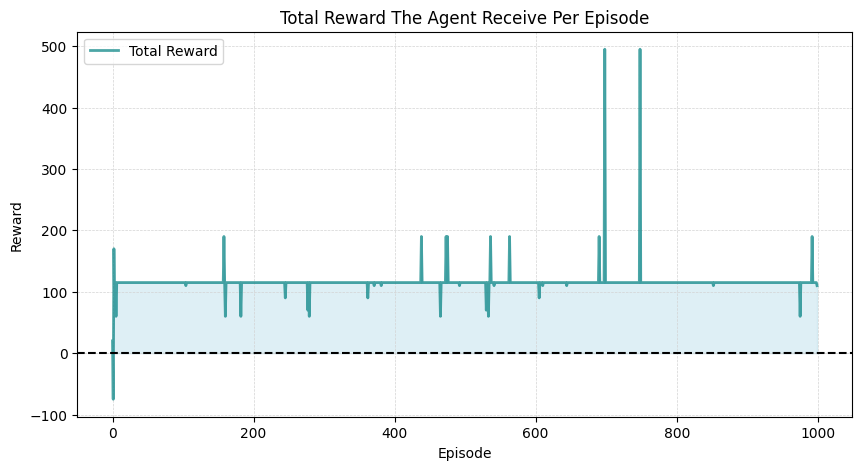

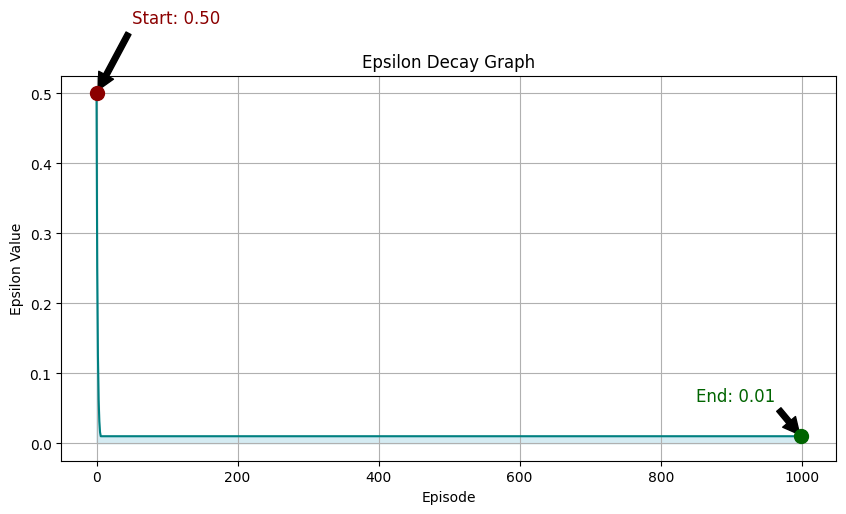

Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115


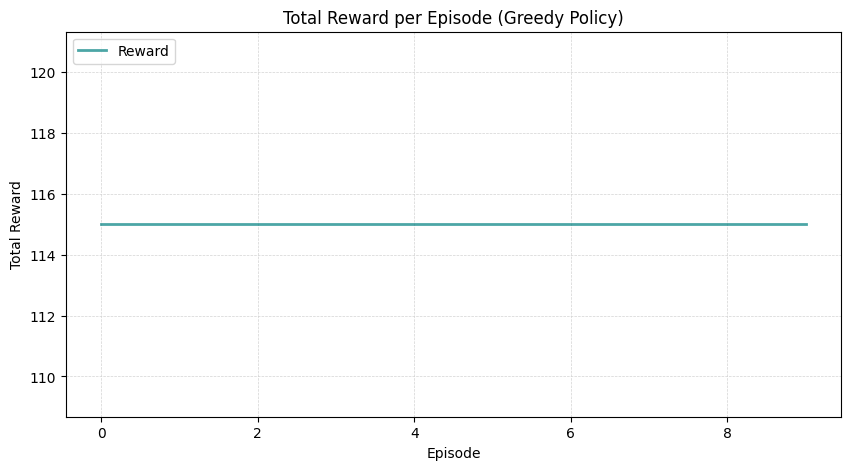

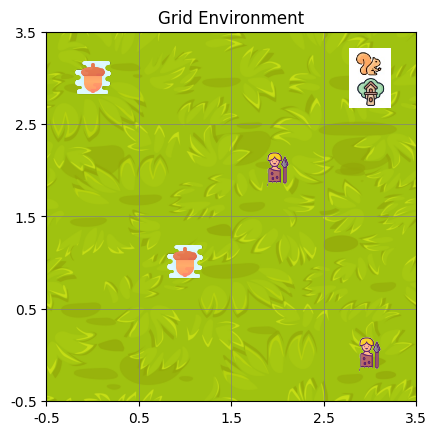

Max Timestamp, Decay Rate:  12, 0.75
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 3.75434456e+02  1.03751871e+02  1.09919602e+01  9.09649132e+01]
 [ 2.08523210e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.05207484e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.04924725e+01  1.33210469e+02  4.44431987e+02  4.83648193e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.55905826e+00 -1.50000000e+00  5.89228734e+00  0.00000000e+00]
 [ 0.00000000e+00  1.44976292e+01 -7.50000000e-01 -1.75366155e+00]
 [ 0.00000000e+00  0.00000000e+00  1.74253882e+02  0.00000000e+00]
 [ 3.49835468e+02  1.64460217e+02  1.17636818e+02  3.06391335e+01]
 [ 0.00000000e+00

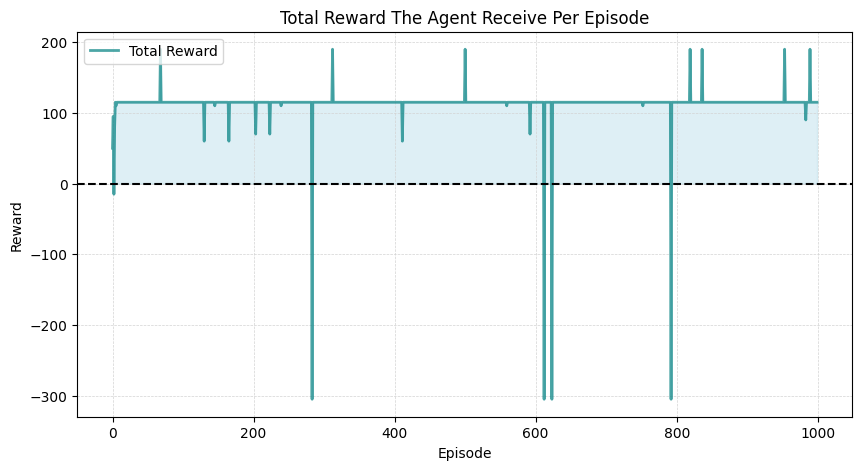

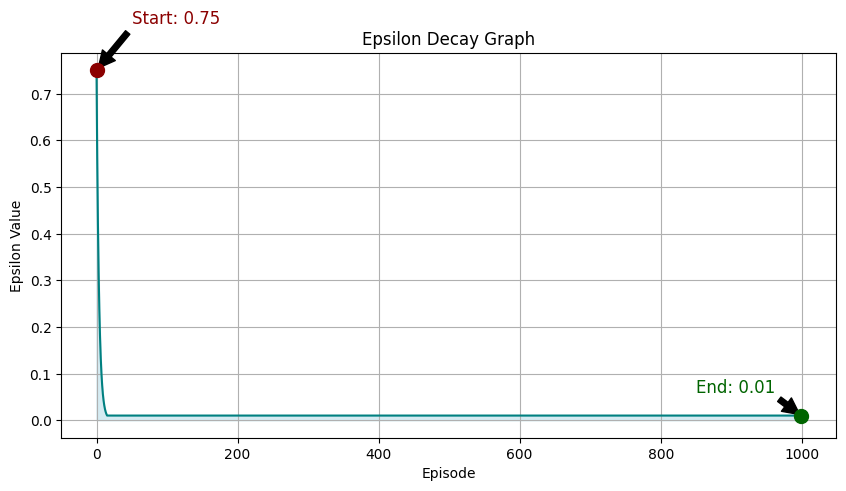

Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115


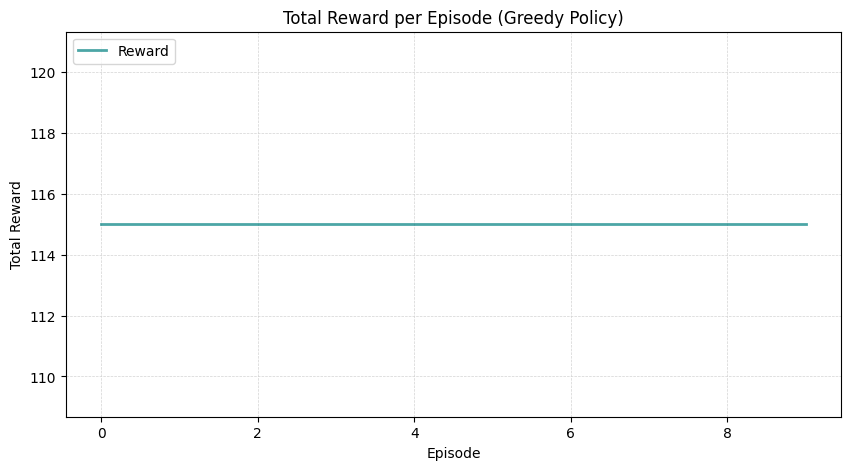

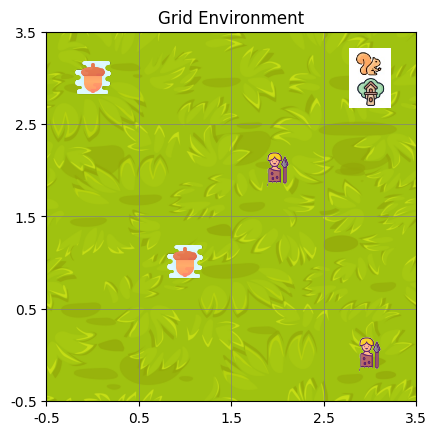

Max Timestamp, Decay Rate:  12, 0.995
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[736.8812531  741.09766692 754.15522698 734.28993913]
 [798.74344334 720.7819662  681.80973036 689.26206417]
 [514.41593594 247.06847512 463.26789505 744.768057  ]
 [  0.           0.           0.           0.        ]
 [357.14041124 540.62211415 794.10006888 474.96970181]
 [  0.           0.           0.           0.        ]
 [693.86244517 693.30290138 729.81179167 797.07655028]
 [243.41092755 762.95287649 337.51850596 243.09730382]
 [173.53713824 251.97917945 562.13732421 151.95130834]
 [275.79304854 793.26817676 533.84920453 324.68589778]
 [  0.           0.           0.           0.        ]
 [710.66694951 172.53023764 266.56104289 224.10778121]
 [  0.           0.       

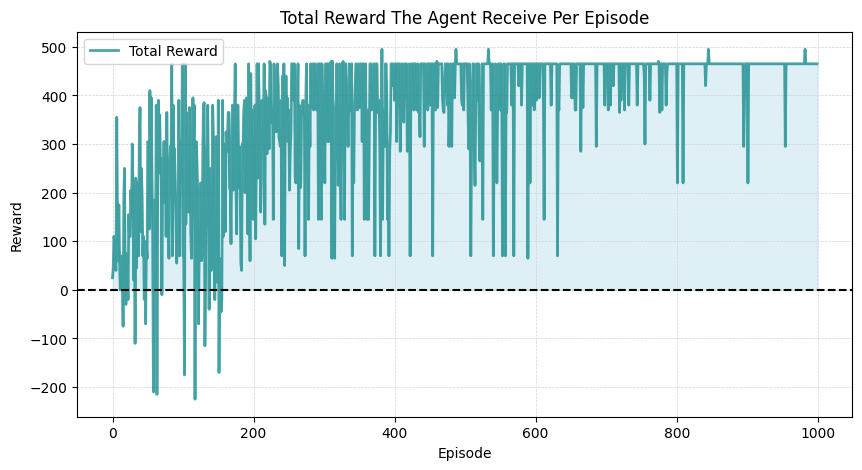

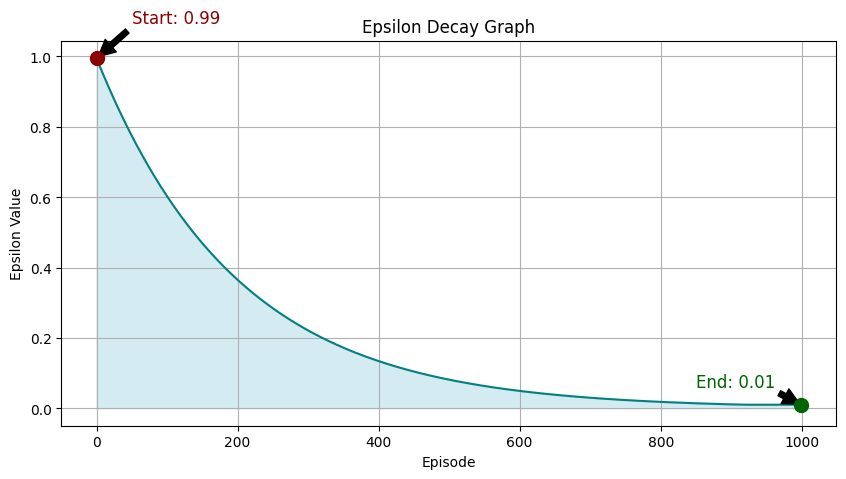

Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465
Episode 1000 Reward: 465


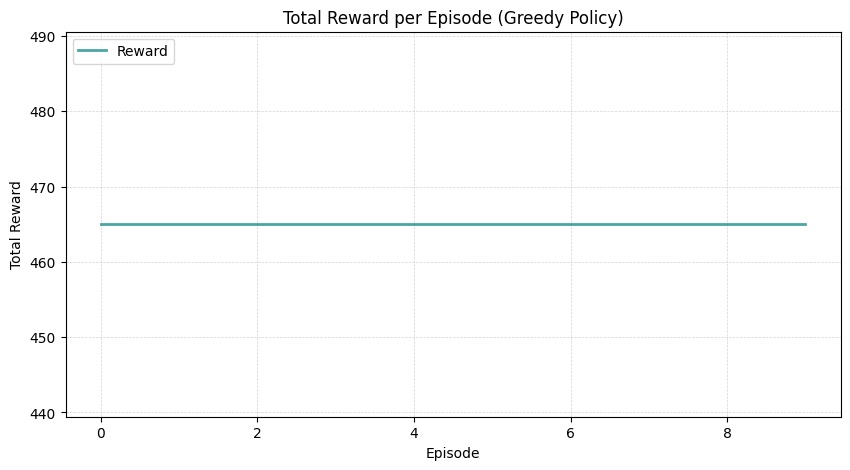

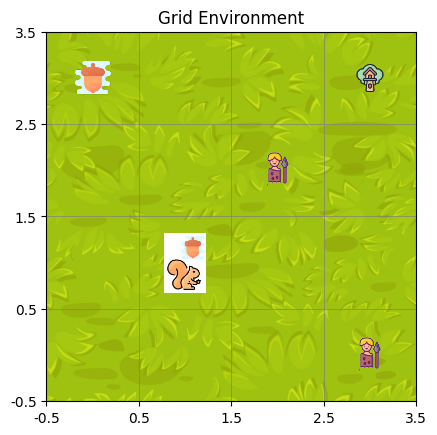

Max Timestamp, Decay Rate:  15, 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[377.71290413  98.56296264  30.9435204  146.13750058]
 [199.58908231  -0.75         0.          -1.28625   ]
 [  1.5          0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 18.19986717  89.01031894 446.83568094  -1.3875    ]
 [  0.           0.           0.           0.        ]
 [ -2.54821266  -1.5          1.5        118.74849231]
 [  1.7781297    0.           0.           0.        ]
 [  0.          -1.28625    130.42789436   0.        ]
 [352.13839425 112.45331991 100.77674526   4.47610729]
 [  0.           0.           0.           0.        ]
 [ 46.48164521   0.           0.           0.        ]
 [  0.           0.         

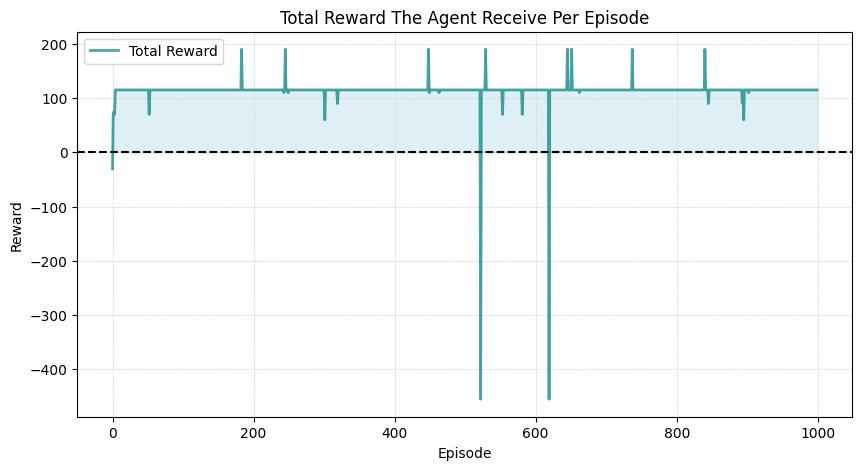

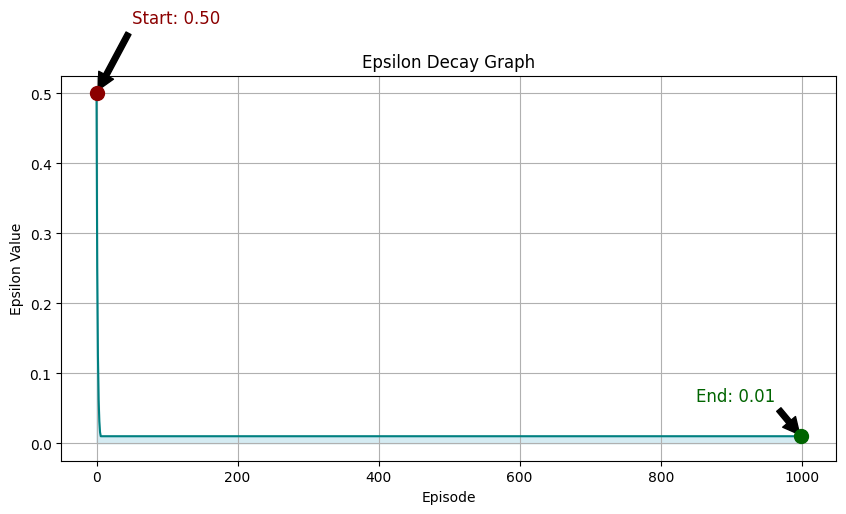

Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115


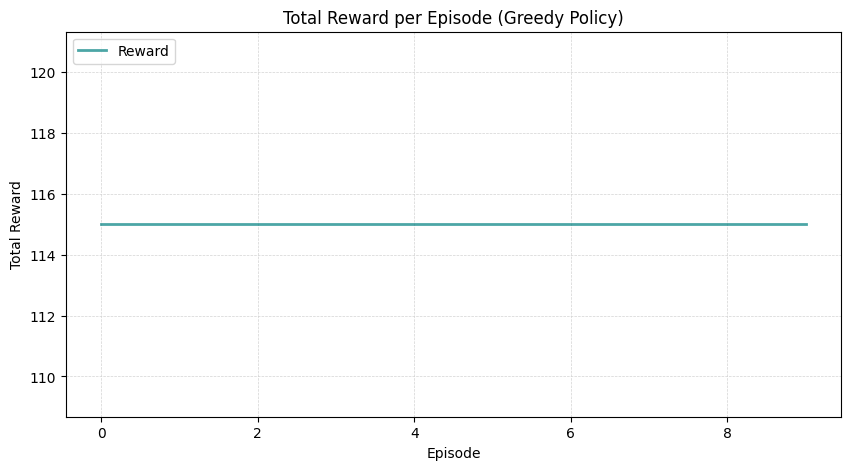

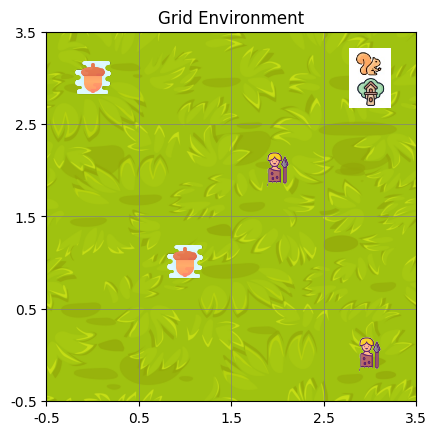

Max Timestamp, Decay Rate:  15, 0.75
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 6.97412813e+02  5.77966189e+02  1.80337956e+02  6.07336231e+02]
 [ 7.53857131e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.50000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.42753823e+02  1.20054922e+02  7.36932680e+02 -1.38750000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.41863153e-01 -1.50000000e+00  3.24700276e+02  0.00000000e+00]
 [ 4.92758803e+02  0.00000000e+00  0.00000000e+00  2.06384333e+01]
 [-6.95012812e+00  6.11309093e+02  2.07868722e+02  0.00000000e+00]
 [ 3.53836683e+02  7.40513849e+02  6.07932928e+02  3.10261011e+02]
 [ 0.00000000e+00

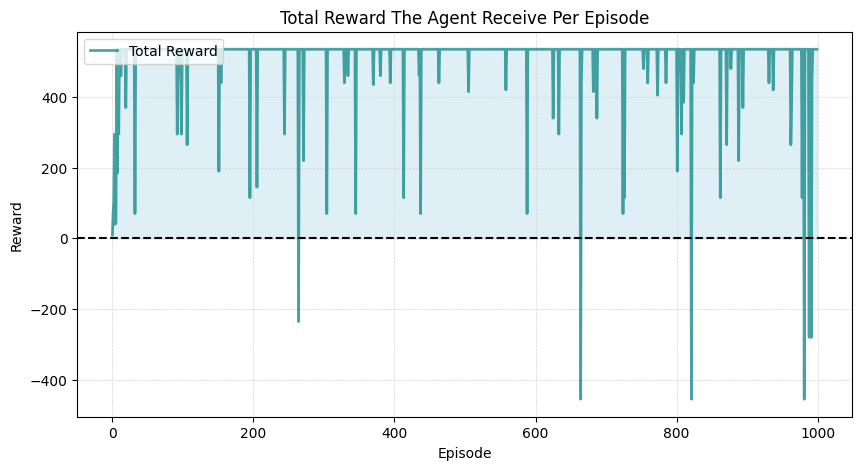

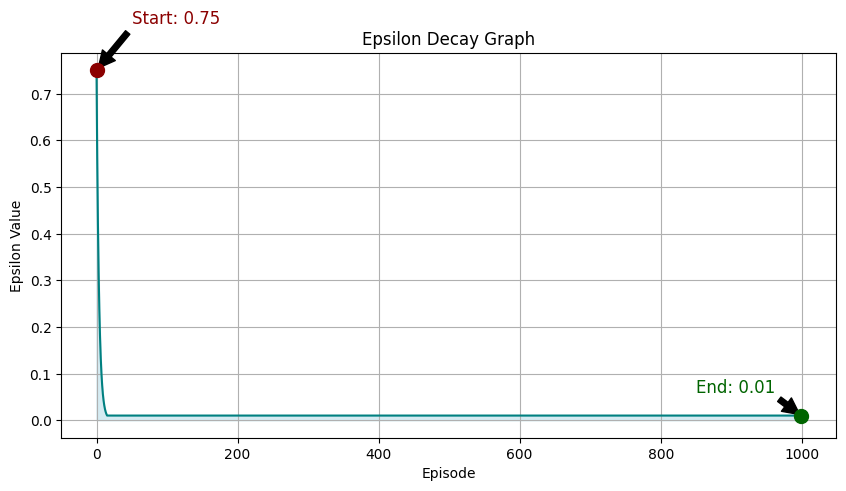

Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535


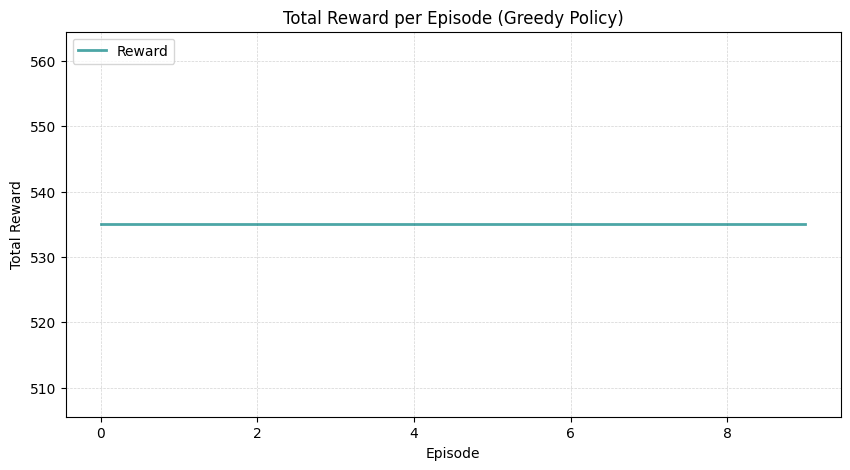

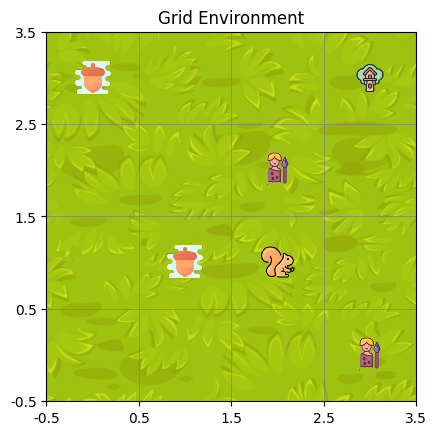

Max Timestamp, Decay Rate:  15, 0.995
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[733.53471843 733.98394971 748.38232365 741.19453681]
 [793.46506288 744.64291668 733.07389907 701.12483591]
 [656.61486883 521.56870516 766.56646369 609.84911036]
 [  0.           0.           0.           0.        ]
 [511.89539483 604.01550333 793.1496316  611.63200479]
 [  0.           0.           0.           0.        ]
 [693.00198762 724.627091   741.4537786  791.74017173]
 [398.05466288 765.27729107 424.52675665 508.26558037]
 [184.82270253 714.59598833 374.44172428 179.40175128]
 [520.80105263 793.04175528 643.48691872 521.69979944]
 [  0.           0.           0.           0.        ]
 [714.13553777 239.19169648 289.73020858 361.12804489]
 [  0.           0.       

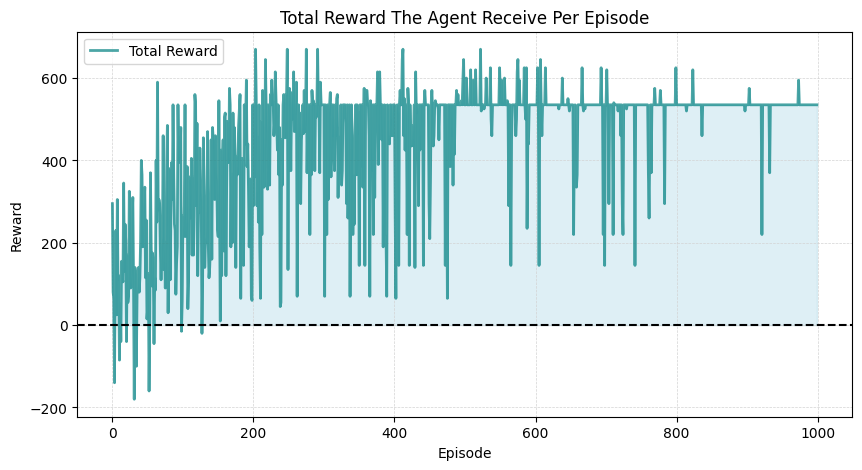

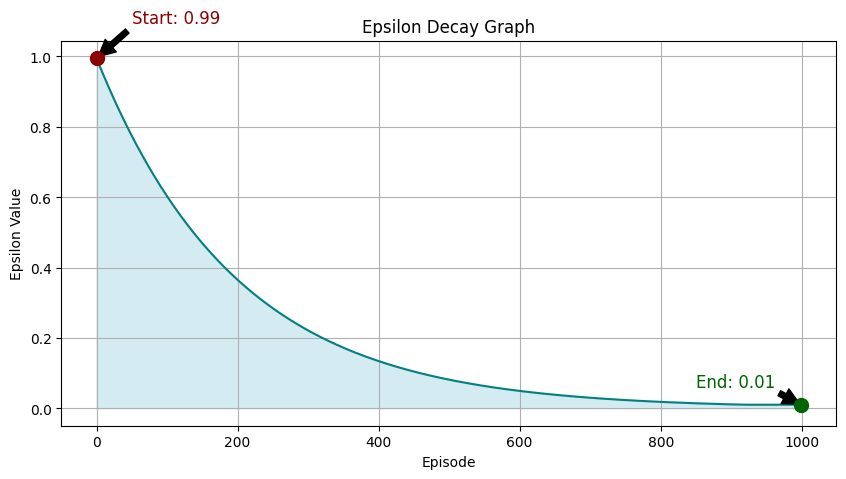

Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535
Episode 1000 Reward: 535


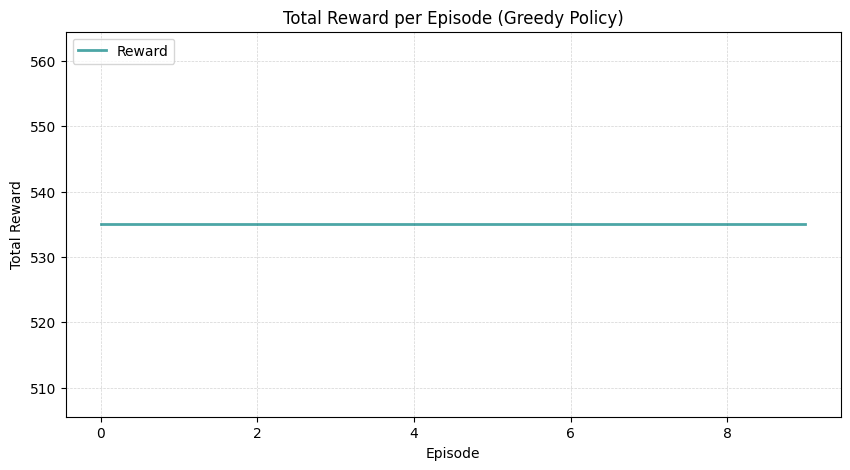

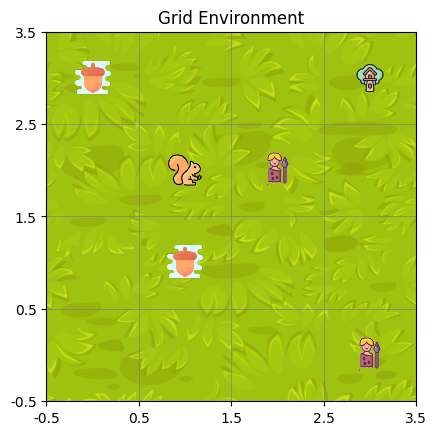

Max Timestamp, Decay Rate:  20, 0.5
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[373.55360391  71.67027378  40.07962224 204.37520551]
 [187.18380752  -0.75         0.          -1.28625   ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ 39.20398987  48.04951428 442.65323854 151.85720112]
 [  0.           0.           0.           0.        ]
 [148.26776677   0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [180.01833923   0.           0.           0.        ]
 [347.86314633 151.013518    91.44376964  27.68439886]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.         

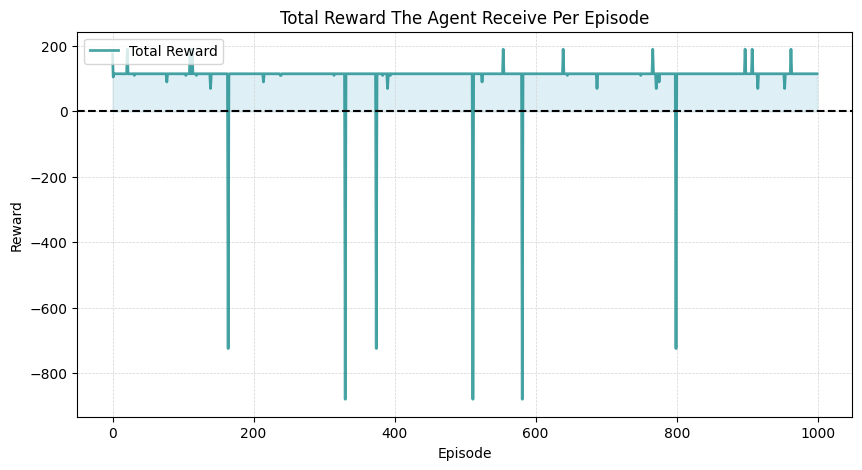

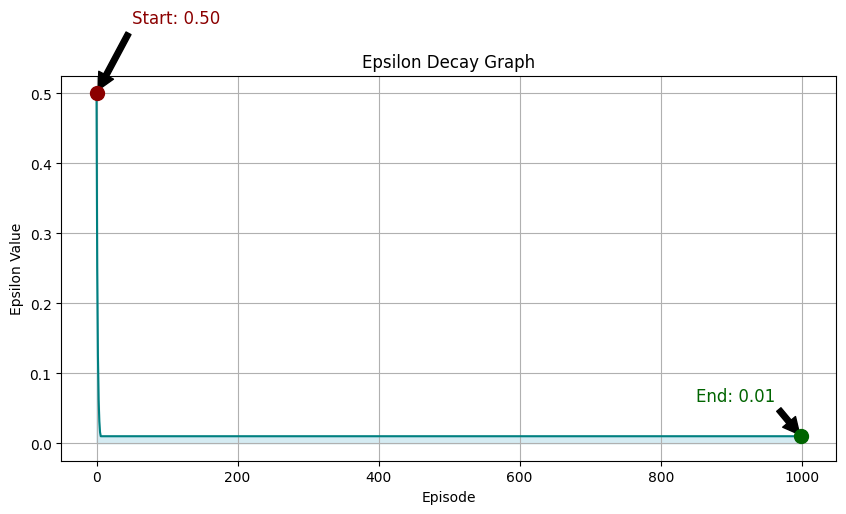

Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115
Episode 1000 Reward: 115


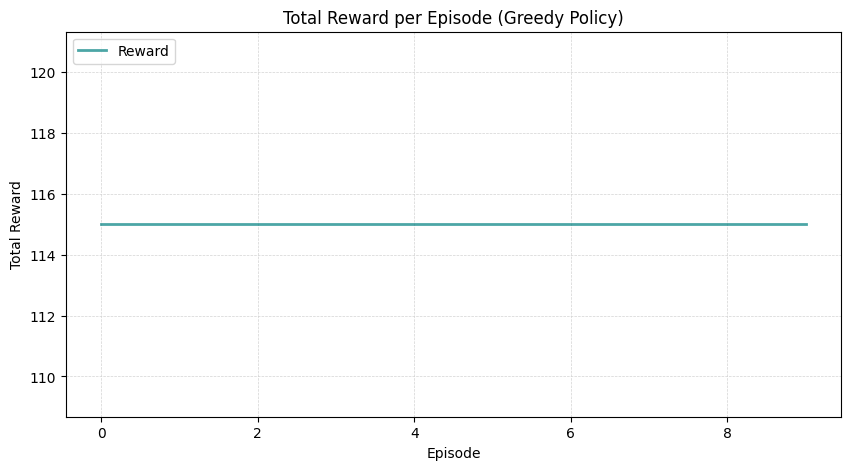

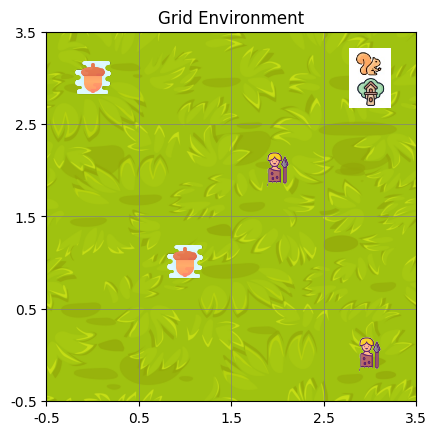

Max Timestamp, Decay Rate:  20, 0.75
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 6.38987824e+02  7.25734068e+02  7.49562424e+02  6.49177100e+02]
 [ 7.92834479e+02  2.88796339e+02  1.01331953e+02  2.64507278e+02]
 [ 8.34176261e+00 -7.50000000e-01  7.46243022e+02  5.36393161e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.27075312e+00  7.56674623e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.66206373e+02  6.53616188e+02  5.65482442e+02  7.92950994e+02]
 [ 0.00000000e+00  7.16787299e+02  0.00000000e+00  2.43640067e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.60459255e+02  9.60921474e-01  0.00000000e+00]
 [ 0.00000000e+00

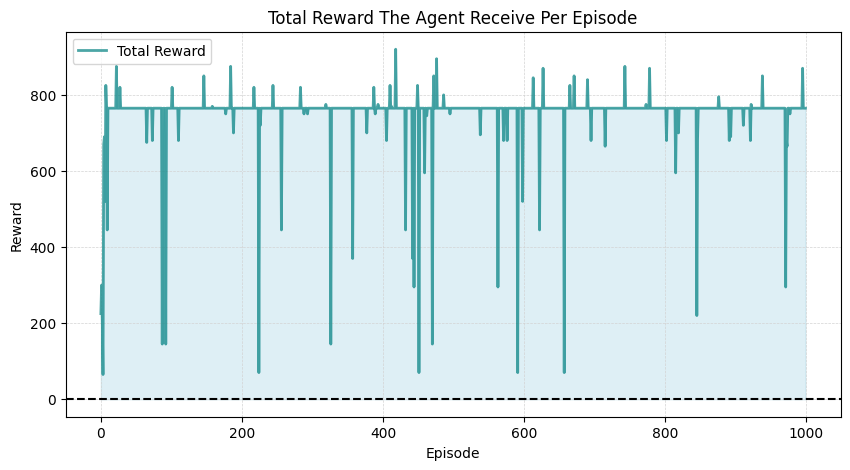

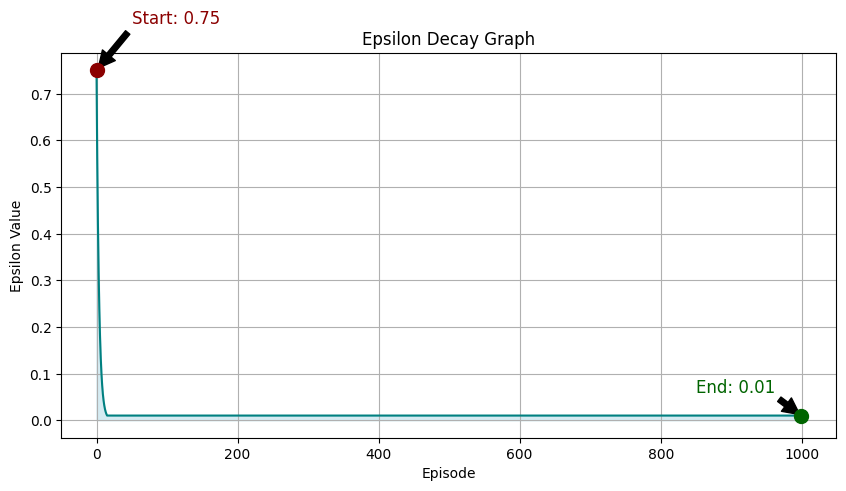

Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765


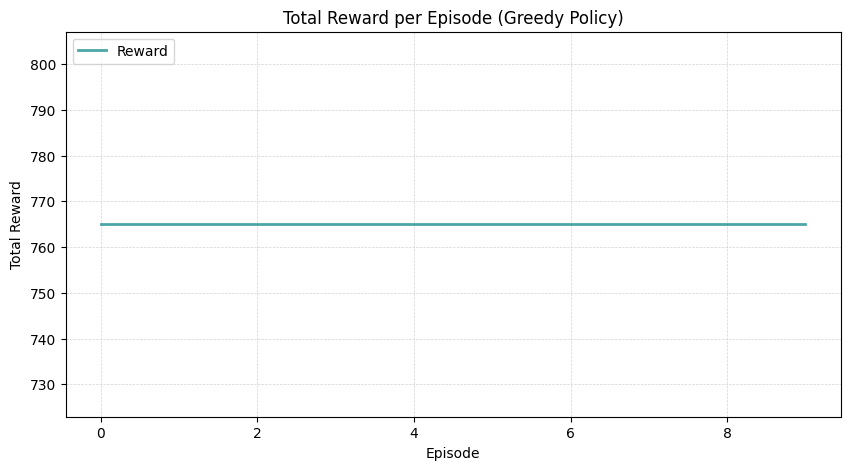

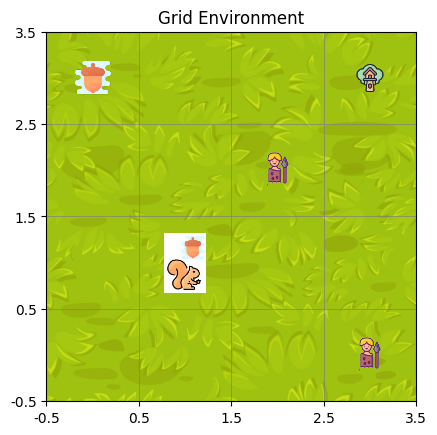

Max Timestamp, Decay Rate:  20, 0.995
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[730.76317821 731.89821346 742.21531758 737.56374657]
 [787.33257048 737.36212994 705.62824704 691.35903236]
 [632.76676341 507.18591034 619.78092102 740.23833301]
 [  0.           0.           0.           0.        ]
 [625.43606989 645.03462686 787.42338126 685.05542471]
 [  0.           0.           0.           0.        ]
 [690.31916467 692.03581163 731.5093874  785.60386448]
 [338.84625093 759.07590389 515.57827956 559.53896103]
 [347.01372959 302.73185331 736.64939132 418.69723789]
 [631.91701811 786.0239795  672.39059142 638.06742027]
 [  0.           0.           0.           0.        ]
 [710.44285412 346.2758193  431.77416158 485.66193405]
 [  0.           0.       

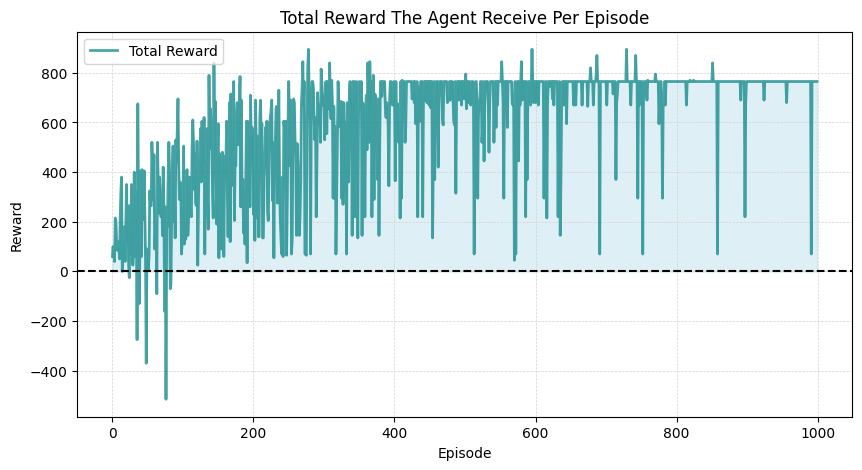

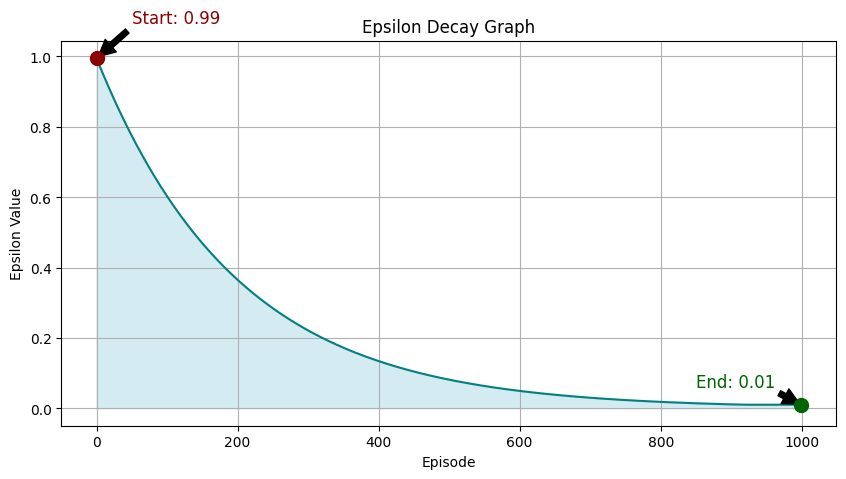

Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765
Episode 1000 Reward: 765


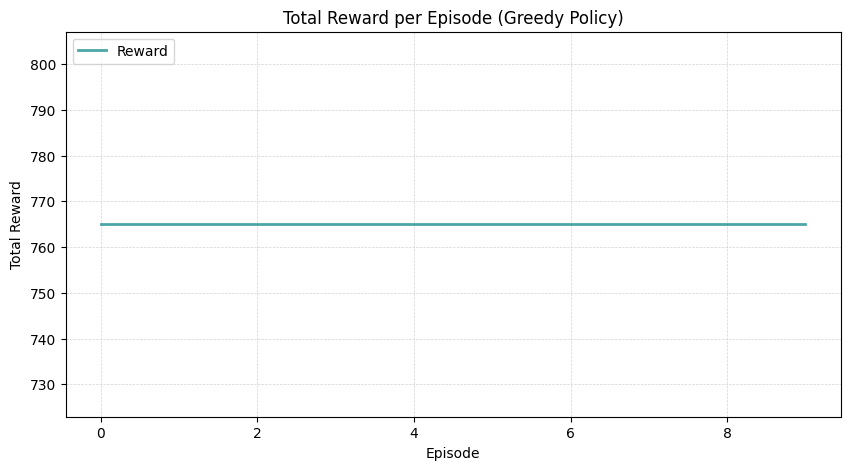

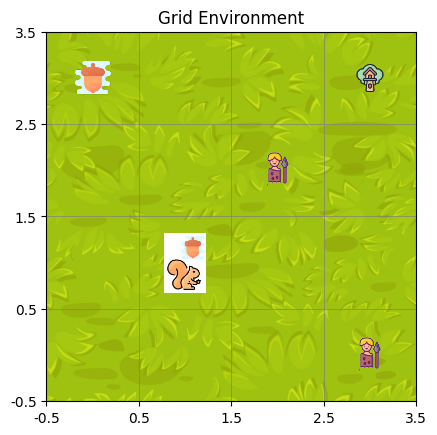

In [ ]:
max_timestamp_values = [12, 15, 20]
decay_val = [0.500, 0.750, 0.995]

for mt in max_timestamp_values:
    for decay in decay_val:
        env = SquirrelPet( alpha=0.15, max_timestamp=mt)
        qt, rewards_epi, epsilon_values, final_state = training_loop(env, decay, max_timestamp)
        evaluate_loop(env, mt, decay, qt, rewards_epi, epsilon_values, final_state)